In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px




In [3]:
visit_data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001370307/CinemaWeeklyVisitors.csv', index_col=0)
visit_data.index = pd.to_datetime(visit_data.index)


Age = pd.read_csv('https://tinyurl.com/ChrisCoDV/001370307/CinemaAge.csv')
Capacity = pd.read_csv('https://tinyurl.com/ChrisCoDV/001370307/CinemaCapacity.csv')
Marketing = pd.read_csv('https://tinyurl.com/ChrisCoDV/001370307/CinemaMarketing.csv ')
Overheads = pd.read_csv('https://tinyurl.com/ChrisCoDV/001370307/CinemaOverheads.csv')
Spendings = pd.read_csv('https://tinyurl.com/ChrisCoDV/001370307/CinemaSpend.csv')

summary_data = pd.merge(Age,Capacity, on="Id")
summary_data = pd.merge(summary_data,Marketing, on="Id")
summary_data = pd.merge(summary_data,Overheads, on="Id")
summary_data = pd.merge(summary_data,Spendings, on="Id")

print(visit_data.describe())

               YBS         BWF          WVA         SJE         XEZ  \
count   209.000000  209.000000   209.000000  209.000000  209.000000   
mean    951.612440   96.220096   799.660287  332.961722  158.550239   
std     101.164556   96.127016    89.321774   19.406791   17.524670   
min     644.000000    0.000000   573.000000  285.000000  104.000000   
25%     890.000000    0.000000   736.000000  322.000000  145.000000   
50%     953.000000  175.000000   796.000000  332.000000  158.000000   
75%    1008.000000  191.000000   852.000000  347.000000  171.000000   
max    1275.000000  210.000000  1035.000000  390.000000  198.000000   

              ZWY         XWO         UDD         YCI         UVQ  ...  \
count  209.000000  209.000000  209.000000  209.000000  209.000000  ...   
mean   147.626794  168.129187  355.550239  135.511962  412.799043  ...   
std     20.927173   32.564840   18.865633    9.266934   50.491886  ...   
min     91.000000   87.000000  294.000000  108.000000  287.00000

In [4]:
categories = ['Top', 'Moderately', 'Less']
categories_selected = [[] for i in range(len(categories))]
for name in visit_data.columns:
    total_Hits = visit_data[name].sum()
    if total_Hits > 150000:
        category = 0
    elif total_Hits > 50000:
        category = 1
    else:
        category = 2
    categories_selected[category].append(name)

for i in range(len(categories)):
    print(categories[i] + ': ' + str(categories_selected[i]))

Top: ['YBS', 'WVA', 'VJV', 'VPG']
Moderately: ['SJE', 'UDD', 'UVQ', 'WBK', 'TVJ', 'TPY', 'RPQ', 'TJN']
Less: ['BWF', 'XEZ', 'ZWY', 'XWO', 'YCI', 'AKA', 'WKL', 'CWN', 'CCX', 'SDT', 'ZQL', 'JJQ', 'BQV', 'BKK', 'WQW', 'XQE', 'YKT', 'ACQ']


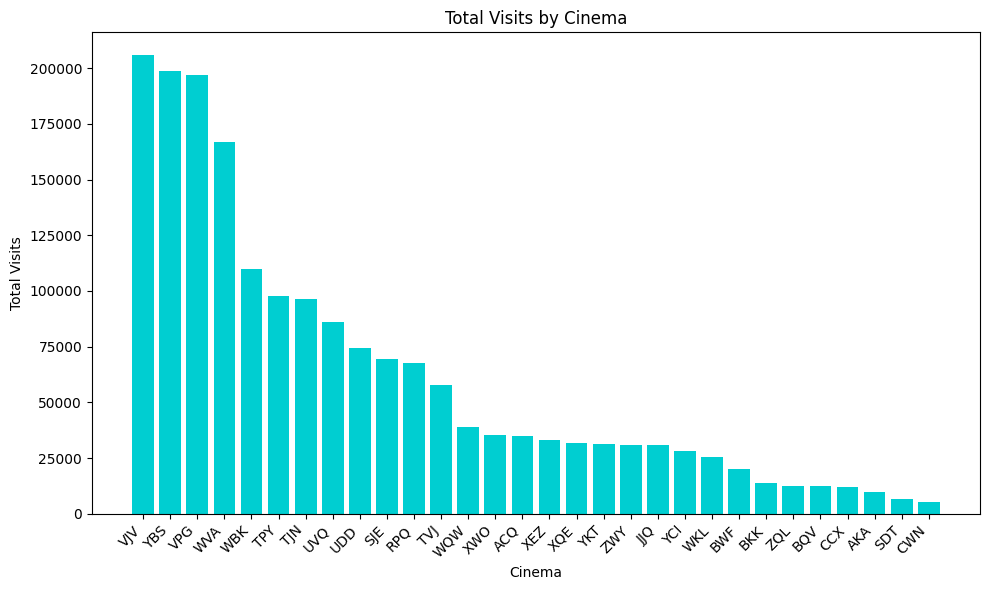

In [5]:
cinema_sums = visit_data.sum()
sorted_df = cinema_sums.sort_values(ascending=0)
cinema_names = sorted_df.index
total_visits = sorted_df.values
plt.figure(figsize=(10, 6))
plt.bar(cinema_names, total_visits, color='DarkTurquoise')
plt.xlabel('Cinema')
plt.ylabel('Total Visits')
plt.title('Total Visits by Cinema')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust spacing
plt.show()

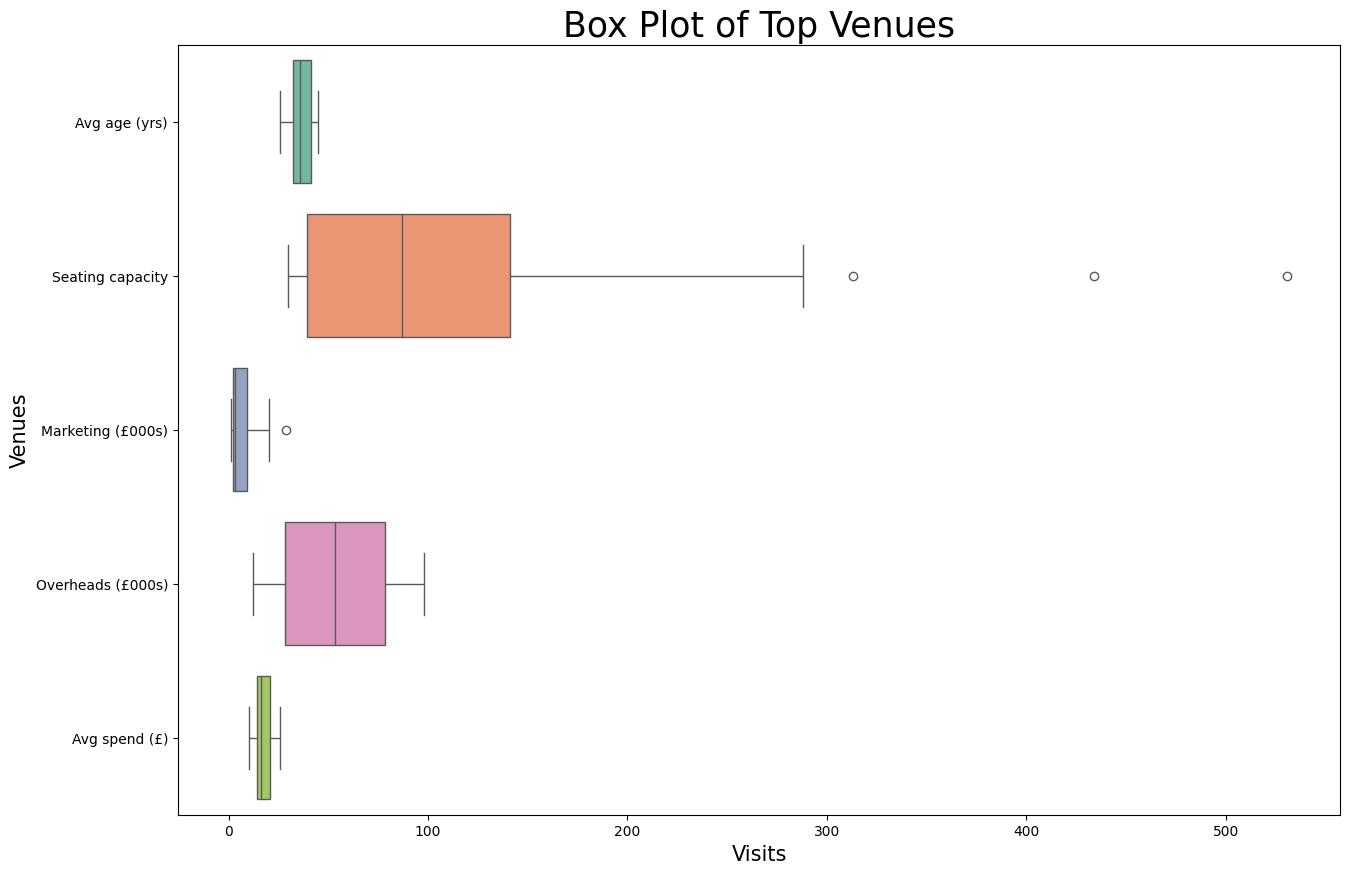

In [6]:

plt.figure(figsize=(15,10))
sns.boxplot(data=summary_data, orient='h',palette='Set2')
plt.title('Box Plot of Top Venues', fontsize=25)
plt.xlabel('Visits', fontsize=15)
plt.ylabel('Venues', fontsize=15)
plt.show()

In [7]:
categories[0]

'Top'

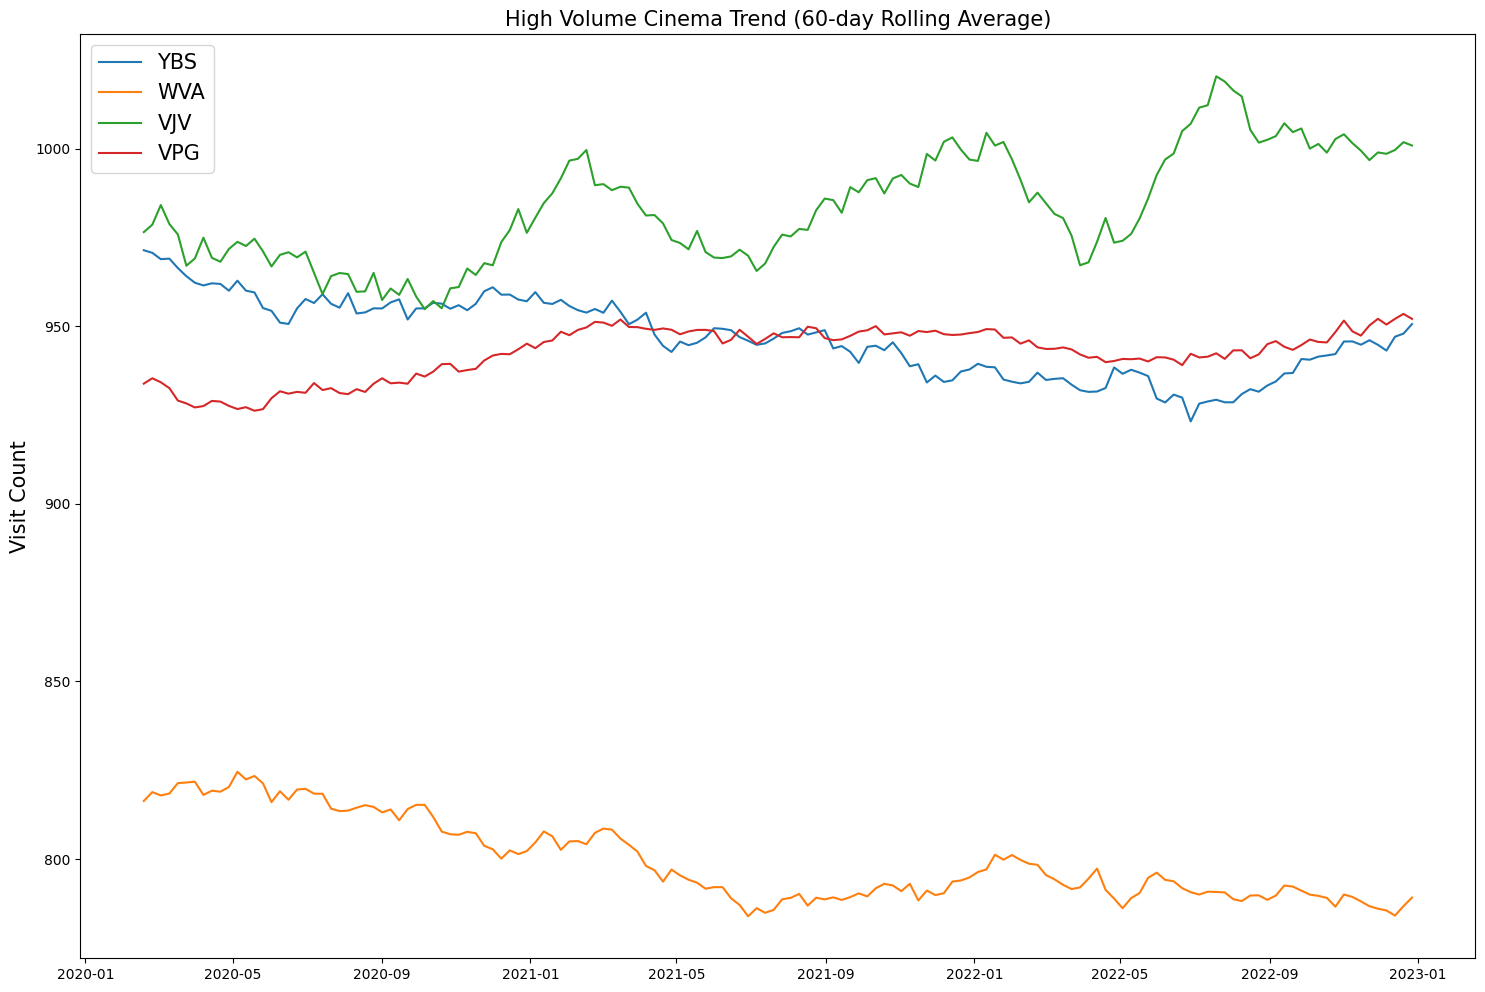

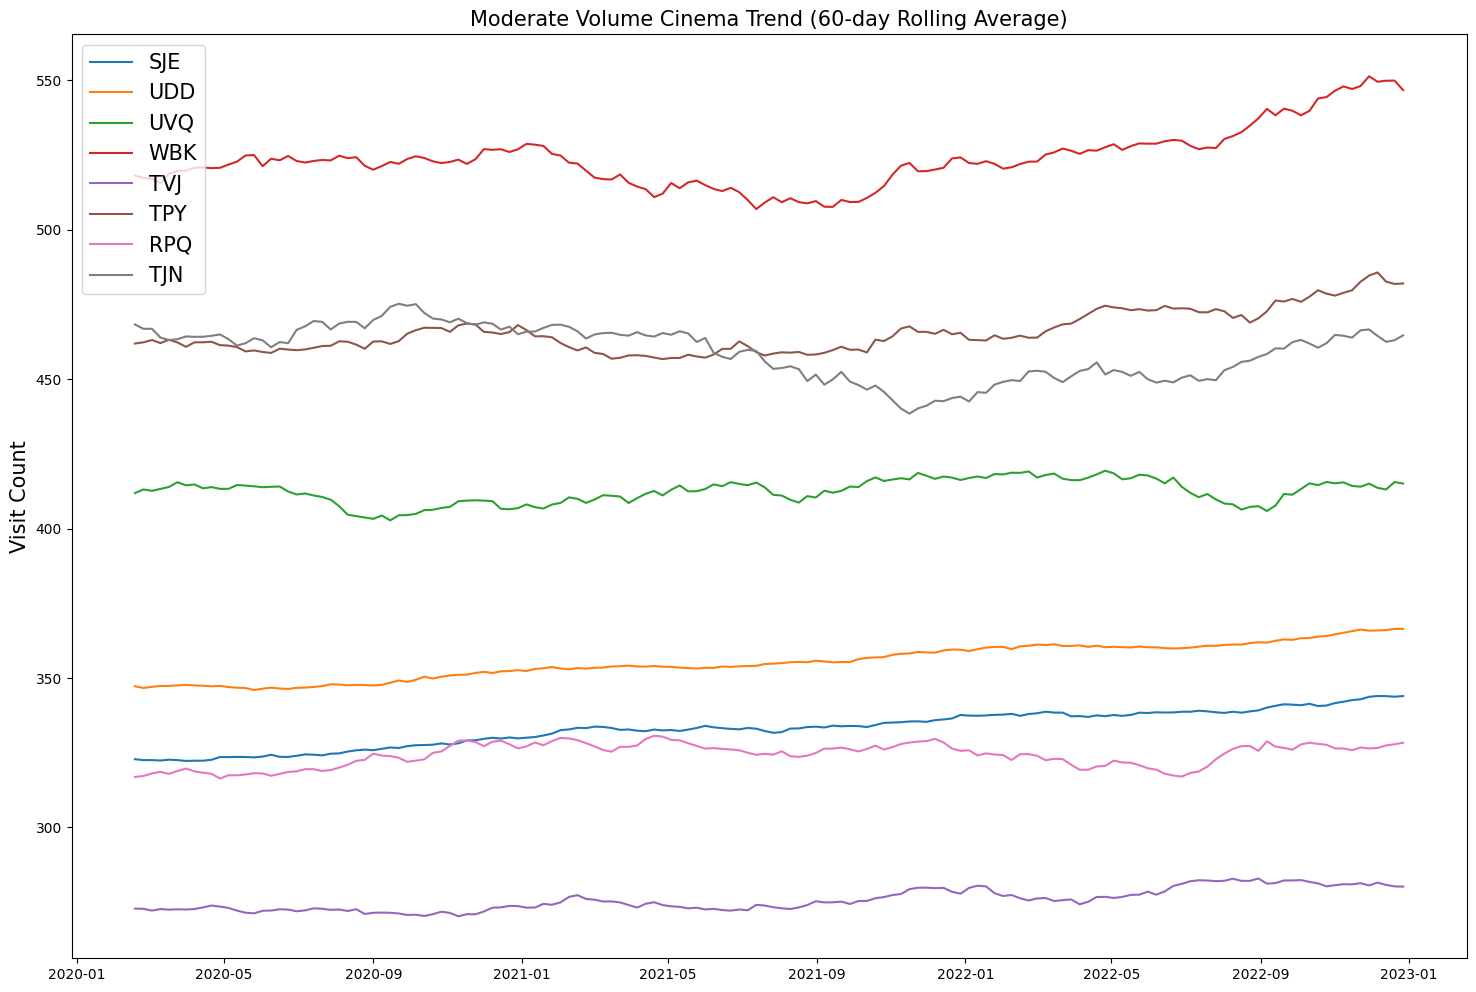

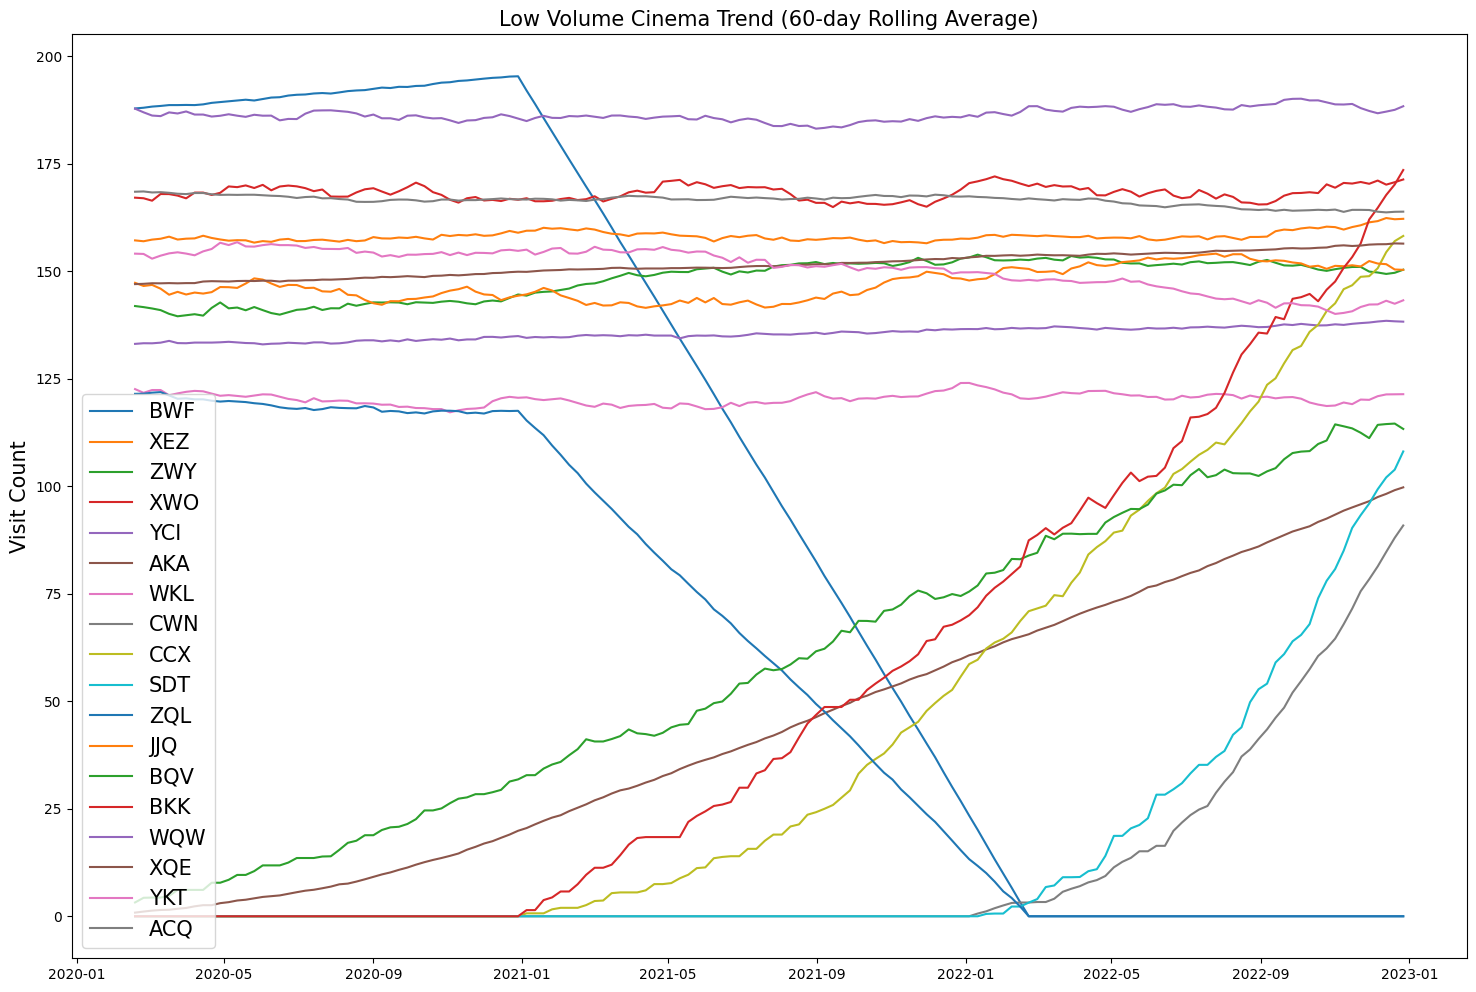

In [8]:
# Calculate the 60-day rolling average for high-volume cinemas
rolling_avg = visit_data.rolling(window=60).mean()

# Create the plot
plt.figure(figsize=(18, 12))
for venue in categories_selected[0]:
    plt.plot(visit_data.index, rolling_avg[venue], label=f'{venue}')

# Customize the plot
plt.legend(fontsize=15)
plt.title('High Volume Cinema Trend (60-day Rolling Average)', fontsize=15)
plt.ylabel('Visit Count', fontsize=15)
plt.savefig('periodicTrend_30dayMA.png', bbox_inches='tight')
plt.show()

# Calculate the 60-day rolling average for medium-volume cinemas
rolling_avg = visit_data.rolling(window=60).mean()

# Create the plot
plt.figure(figsize=(18, 12))
for venue in categories_selected[1]:
    plt.plot(visit_data.index, rolling_avg[venue], label=f'{venue}')

# Customize the plot
plt.legend(fontsize=15)
plt.title('Moderate Volume Cinema Trend (60-day Rolling Average)', fontsize=15)
plt.ylabel('Visit Count', fontsize=15)
plt.savefig('periodicTrend_30dayMA.png', bbox_inches='tight')
plt.show()

# Calculate the 60-day rolling average for high-volume cinemas
rolling_avg = visit_data.rolling(window=60).mean()

# Create the plot
plt.figure(figsize=(18, 12))
for venue in categories_selected[2]:
    plt.plot(visit_data.index, rolling_avg[venue], label=f'{venue}')

# Customize the plot
plt.legend(fontsize=15)
plt.title('Low Volume Cinema Trend (60-day Rolling Average)', fontsize=15)
plt.ylabel('Visit Count', fontsize=15)
plt.savefig('periodicTrend_30dayMA.png', bbox_inches='tight')
plt.show()



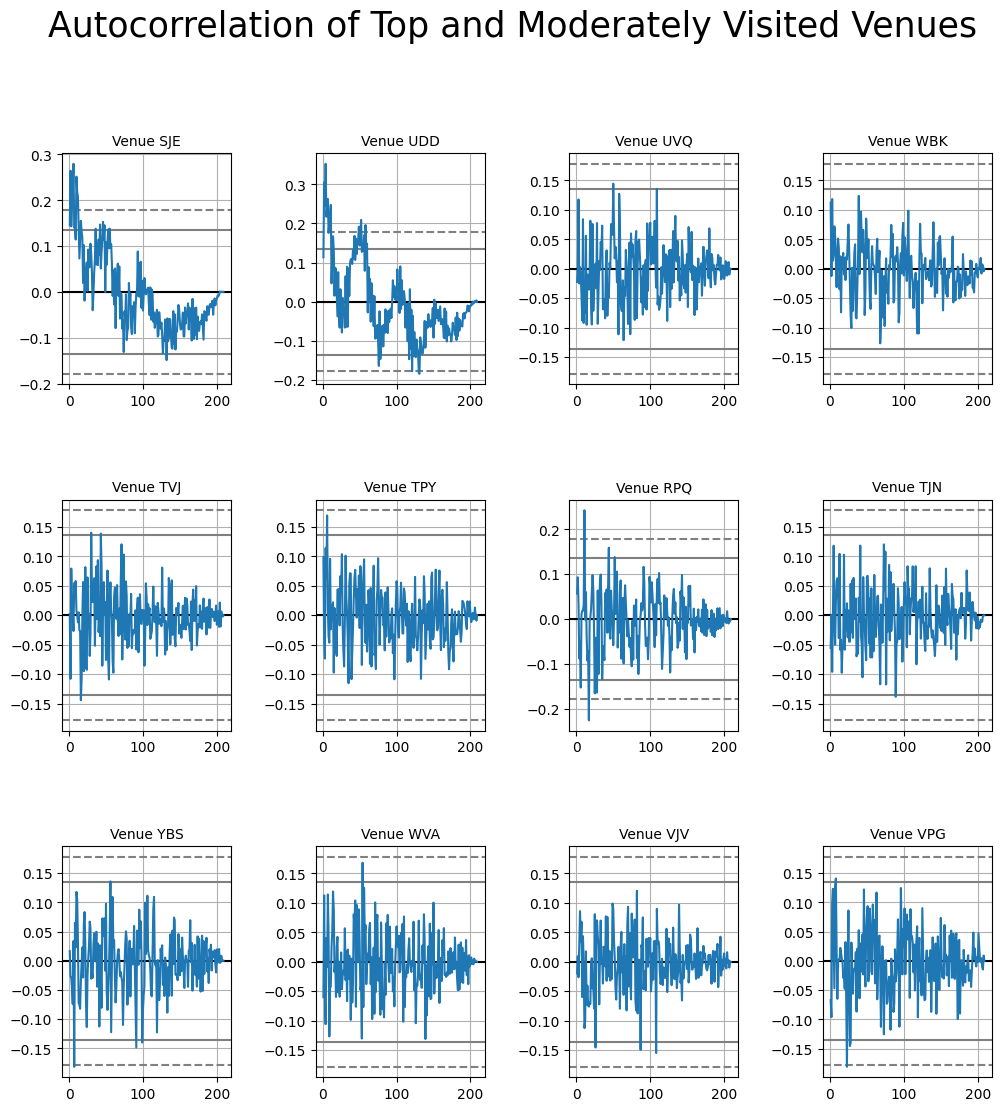

In [9]:
# Select the relevant columns
selected_venues = categories_selected[1] + categories_selected[0]
selected_columns = [name for name in visit_data[selected_venues].columns if not visit_data[selected_venues][name].dropna().empty]

# Set up the plot grid
num_plots = len(selected_columns)
num_cols = 4
num_rows = -(-num_plots // num_cols)  # Ceiling division

# Create the subplots
fig, axes = plt.subplots(figsize=(12, 12), nrows=num_rows, ncols=num_cols)
fig.suptitle('Autocorrelation of Top and Moderately Visited Venues', fontsize=25, position=(0.5, 1.0))

# Plot autocorrelation for each selected column
for i, name in enumerate(selected_columns):
    row = i // num_cols
    col = i % num_cols
    autocorrelation = pd.plotting.autocorrelation_plot(visit_data[selected_venues][name], ax=axes[row, col])
    autocorrelation.set_title('Venue ' + name, fontsize=10)
    autocorrelation.xaxis.label.set_visible(False)
    autocorrelation.yaxis.label.set_visible(False)

# Remove any epltty subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()


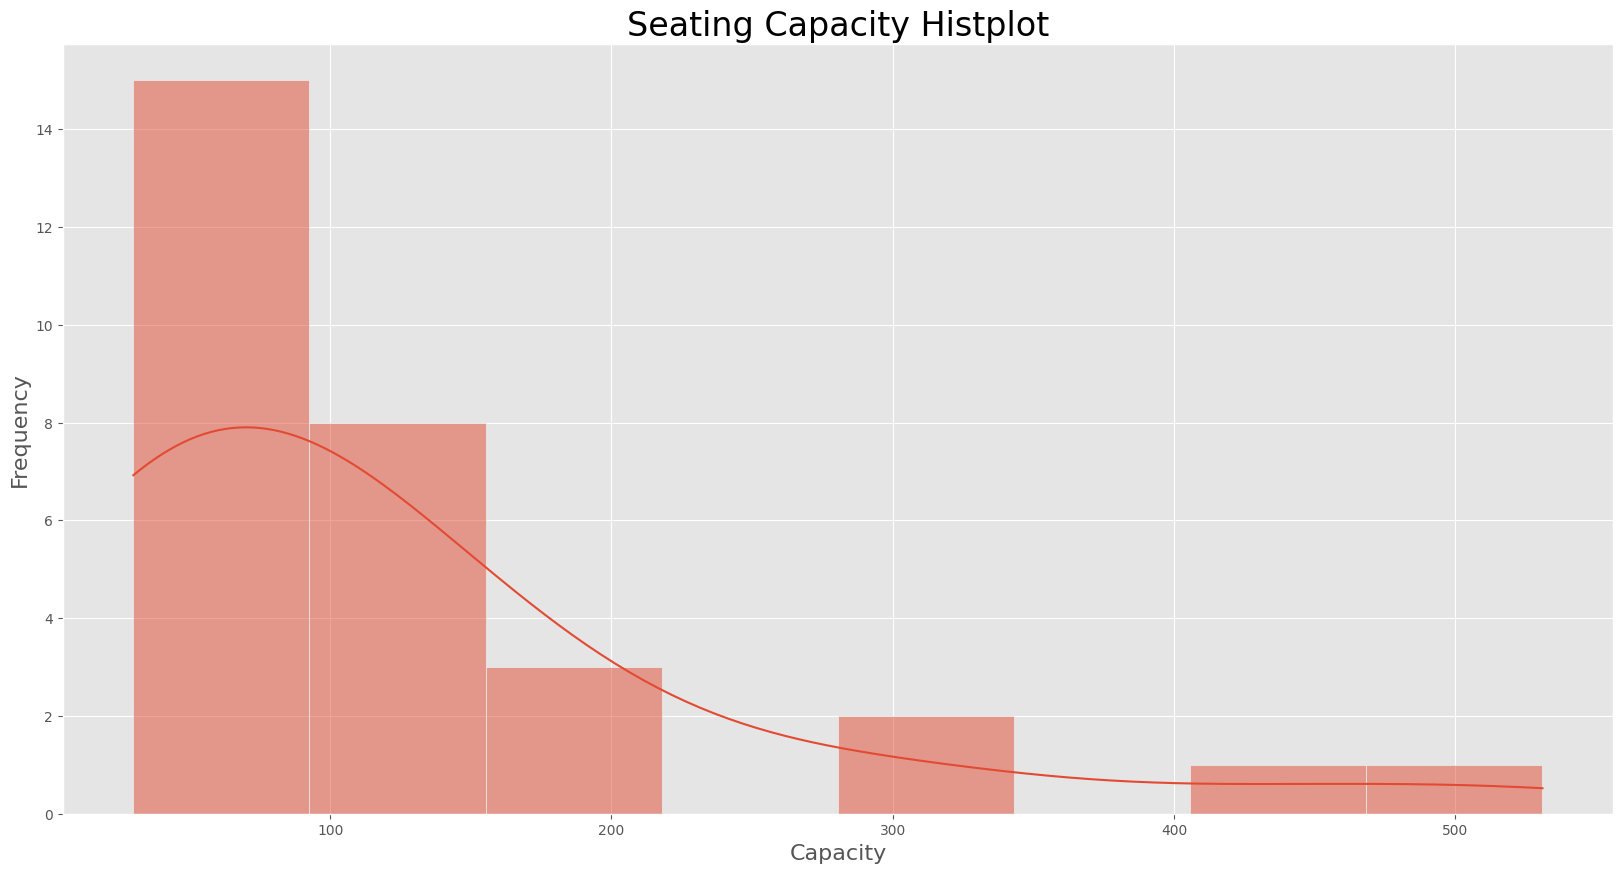

In [10]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
sns.histplot(summary_data['Seating capacity'], kde=True)
plt.title('Seating Capacity Histplot', fontsize= 24)
plt.ylabel('Frequency', fontsize= 16)
plt.xlabel('Capacity', fontsize = 16)
plt.savefig('histPlot.png',bbox_inches='tight')
plt.show()

In [11]:
import holoviews as hv
import hvplot.pandas 
plot = visit_data.corr().hvplot.heatmap(
    frame_height=800, frame_width=600,
    title='Venue correlations',
    rot=90, cmap='coolwarm'
).opts(invert_yaxis=True, clim=(-1, 1))
hv.extension('bokeh')
plot

:HeatMap   [columns,index]   (value)

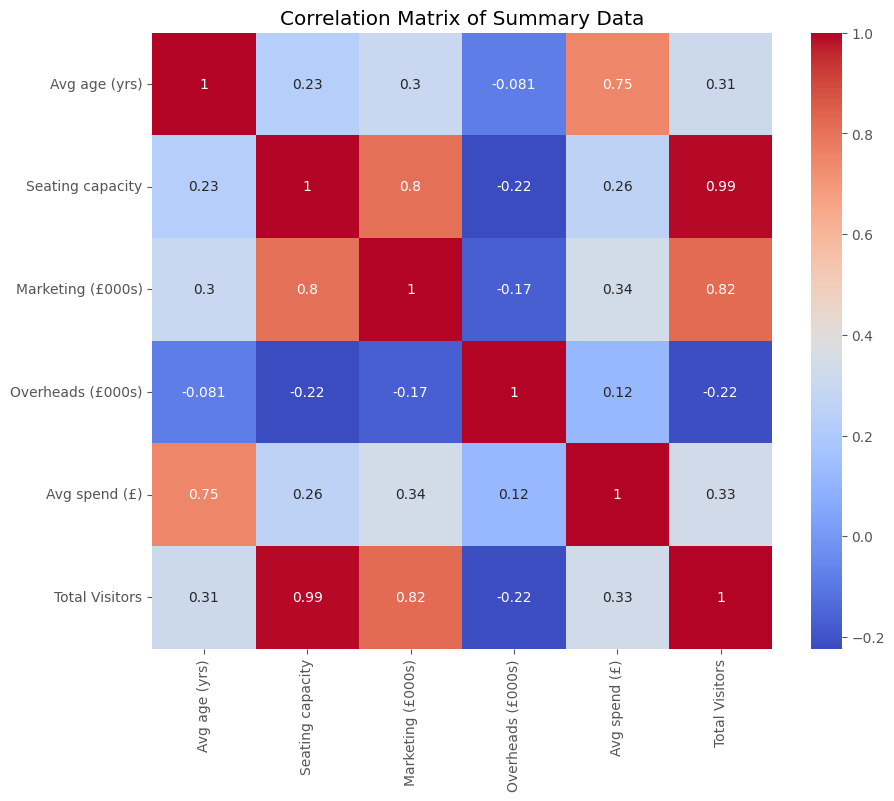

In [13]:
summary_data['Total Visitors'] = summary_data['Seating capacity'] * summary_data['Avg age (yrs)']
plt.figure(figsize=(10, 8))
sns.heatmap(summary_data.drop("Id", axis=1).corr(), annot=True, 
cmap="coolwarm")
plt.title("Correlation Matrix of Summary Data")
plt.show()



In [39]:
import plotly.graph_objects as go

# Assume `categories_selected` is a list of selected venues
selected_venues = categories_selected[0]

# Initialize the figure
fig = go.Figure()

# Add traces for each selected venue
for venue in selected_venues:
    fig.add_trace(go.Scatter(x=visit_data.index, y=visit_data[venue], mode='lines', name=venue))

# Update layout settings
fig.update_layout(
    title='Trend of Popular Venues',
    xaxis_title='Date',
    yaxis_title='Visits',
    autosize=False,
    width=800,
    height=600,
)

# Display the plot
fig.show()
